In [66]:
import numpy as np 
import pandas as pd

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df1 = pd.read_csv("song_data.csv")
df2 = pd.read_csv("song_info.csv")

df1.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [69]:
df2.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [70]:
print(df1.shape , df2.shape)

(18835, 15) (18835, 4)


In [71]:
# PRE PROCESSING 

In [72]:
# since both the data is useful for us , we merge the 2 seperate tables into 1 

In [73]:
# since both tables have a column named "song_name" we drop it from df2

# concatinating both 
df2 = df2.drop(['song_name'] , axis = 1)
df = pd.concat([df1 , df2] , axis=1)
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


In [74]:
df.shape

(18835, 18)

In [75]:
# saving our new dataset 

df.to_csv("our_dataset.csv")

In [76]:
# data analysis and feature engineering 

In [77]:
# encoding strings 
from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()


df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


In [78]:
# adding the target ie: song_popularity towards the end just for convenience 

df = df.assign(column_name=df['song_popularity']).drop('song_popularity', axis=1)
df.rename(columns={'column_name': 'song_popularity'}, inplace=True)

df.head()

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,song_popularity
0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,73
1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems,66
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems,76
3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74
4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems,56


In [79]:
# checking if there is any missing values 

print(df.isnull().sum())

song_name           0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
artist_name         0
album_names         0
playlist            0
song_popularity     0
dtype: int64


In [80]:
# as we can see there is no null values and hence nothing is required 

In [81]:
# classification of popularity

'''

We need to classify the song's popularity at multiple degrees to do that we need
to decide on a threshold of what rating makes a song a super hit 
while what rating is average, below average, low, etc. 

'''

"\n\nWe need to classify the song's popularity at multiple degrees to do that we need\nto decide on a threshold of what rating makes a song a super hit \nwhile what rating is average, below average, low, etc. \n\n"

In [82]:
popularity = list(df['song_popularity'])
popularity.sort()
print(popularity)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [83]:
print(max(df['song_popularity']) , min(df['song_popularity']))

100 0


In [84]:
''' 
as we can see we have every type of popularity and hence we need to trynna find 
a distribution curve to know the distribution of the data -> distplot

'''

' \nas we can see we have every type of popularity and hence we need to trynna find \na distribution curve to know the distribution of the data -> distplot\n\n'

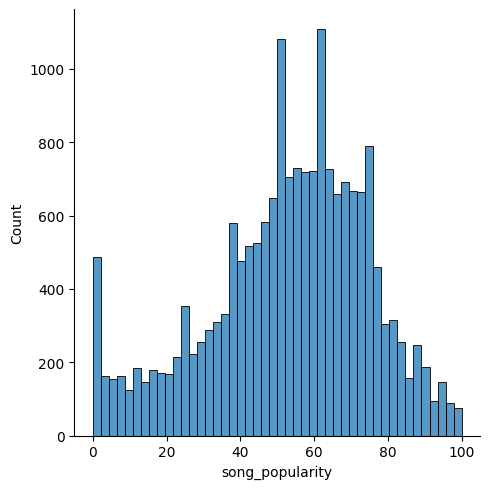

In [85]:
sns.displot(df["song_popularity"])
# plothist_median("song_popularity")


In [86]:
df["song_popularity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18835 entries, 0 to 18834
Series name: song_popularity
Non-Null Count  Dtype
--------------  -----
18835 non-null  int64
dtypes: int64(1)
memory usage: 147.3 KB


In [87]:
# let's view various percentile cutoffs using the describe function 
df["song_popularity"].describe(percentiles=[.05, .10, .25, .50, .75, .8, .90, .95])

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
5%           8.000000
10%         21.000000
25%         40.000000
50%         56.000000
75%         69.000000
80%         72.000000
90%         78.000000
95%         85.000000
max        100.000000
Name: song_popularity, dtype: float64

In [88]:
'''

We call the song with greater than equal 
90%ile<= as "potential masterpiece" --> 100 => 78-100
75-90%ile as "popular" --> 200 => 69-78
50-75%ile as "mildly popular" --> 300 => 56-69
50%ile> as "potential flop" --> 400 => 0-56


'''

'\n\nWe call the song with greater than equal \n90%ile<= as "potential masterpiece" --> 100 => 78-100\n75-90%ile as "popular" --> 200 => 69-78\n50-75%ile as "mildly popular" --> 300 => 56-69\n50%ile> as "potential flop" --> 400 => 0-56\n\n\n'

In [89]:
# percentage of songs that are potential masterpieces
print("percentage of songs that are potential masterpieces: ", len(df[df["song_popularity"]>=78])/len(df)*100)

#percentage of songs that are popular
print("percentage of songs that are popular: ", len(df[(df["song_popularity"]>=69) & (df["song_popularity"]<78)])/len(df)*100)


#percentage of songs that are mildly popular
print("#percentage of songs that are mildly popular: ", len(df[(df["song_popularity"]>=56) & (df["song_popularity"]<69)])/len(df)*100)

#percentage of songs that are potential flops
print("#percentage of songs that are potential flops: ", len(df[df["song_popularity"]<56])/len(df)*100)

percentage of songs that are potential masterpieces:  10.963631537032121
percentage of songs that are popular:  14.573931510485796
#percentage of songs that are mildly popular:  24.486328643482878
#percentage of songs that are potential flops:  49.9761083089992


So there is no imbalance in our data and the margins.

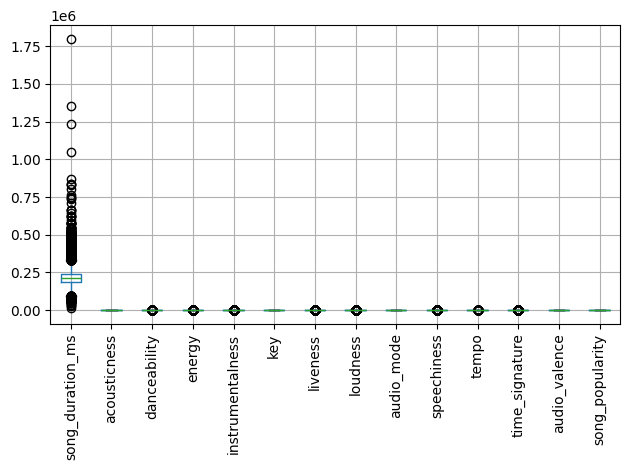

In [90]:
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()


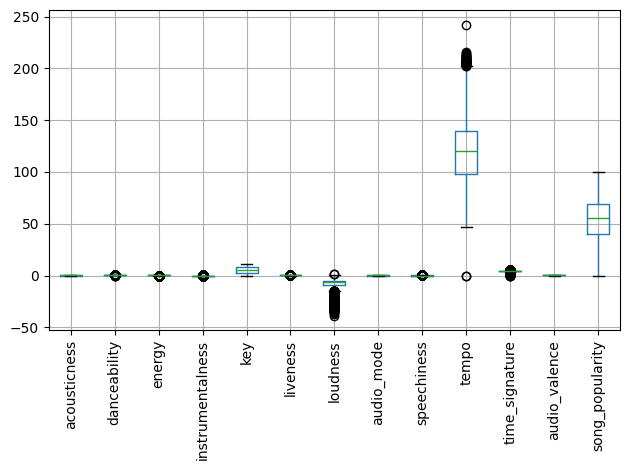

In [91]:
df.drop('song_duration_ms', axis = 1).boxplot()
plt.xticks(rotation = 90)

plt.tight_layout()

In [92]:
df['key']

0         8
1         3
2         0
3         0
4        10
         ..
18830    11
18831    11
18832     0
18833     3
18834     4
Name: key, Length: 18835, dtype: int64

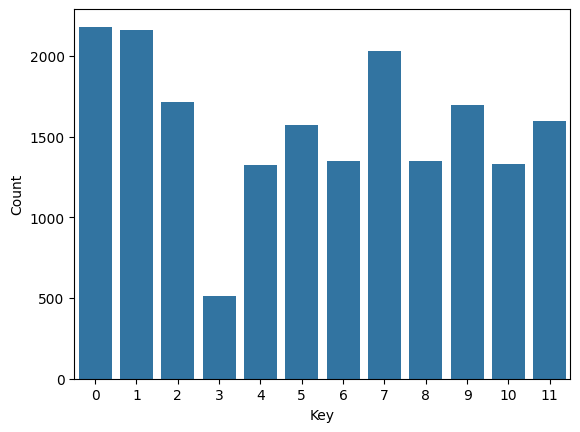

In [93]:
# plot countplot of key
sns.countplot(x=df['key'])
plt.ylabel("Count")
plt.xlabel("Key")
# plt.grid(True)
plt.show()

# plt.xticks(rotation = 90)
# plt.tight_layout()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
 14  artist_name       18835 non-null  object 
 15  album_names       18835 non-null  object 
 16  playlist          18835 non-null  object

In [95]:
df['audio_mode'].value_counts()

audio_mode
1    11831
0     7004
Name: count, dtype: int64

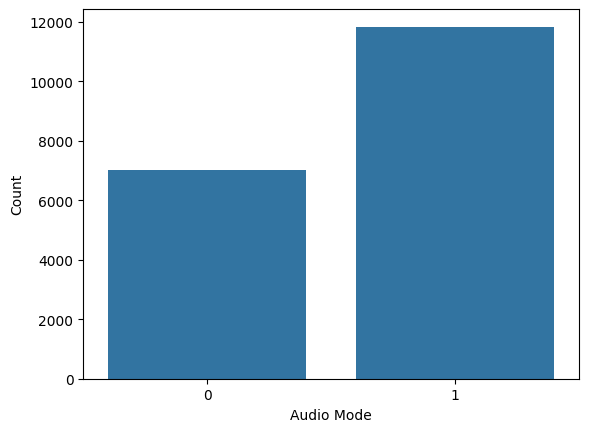

In [96]:
sns.countplot(x=df['audio_mode'])
plt.ylabel("Count")
plt.xlabel("Audio Mode")

plt.show()

In [97]:
df['time_signature'].value_counts()

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

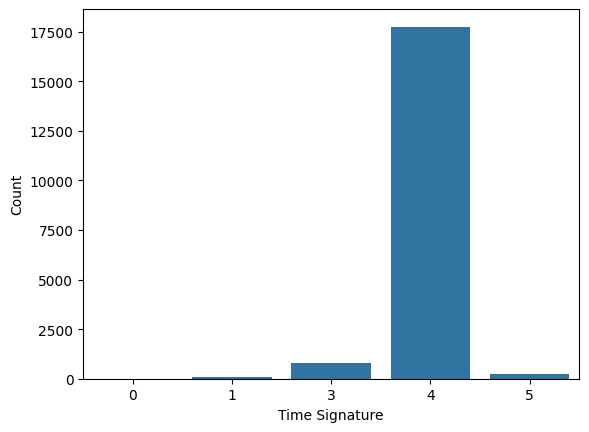

In [98]:
sns.countplot(x=df['time_signature'])
plt.ylabel("Count")
plt.xlabel("Time Signature")

plt.show()

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
 14  artist_name       18835 non-null  object 
 15  album_names       18835 non-null  object 
 16  playlist          18835 non-null  object

In [100]:
def plothist_median(column_name : str, y_res : int = 0):
    # Assuming you have a DataFrame named df and you want to plot a specific column
    # column_name = 'song_duration_ms'/

    # Create a histogram plot
    ax = sns.histplot(x=df[column_name])

    # Calculate the median and mean of the data
    median_value = df[column_name].median()
    mean_value = df[column_name].mean()

    # Add vertical lines for the median and mean
    ax.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f}')
    ax.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')

    if(y_res):
        plt.ylim(0, y_res)

    # Add labels and legend
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot
    plt.show()



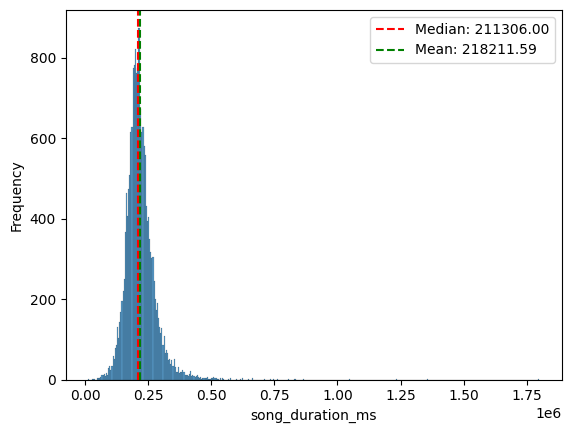

In [101]:
plothist_median("song_duration_ms")


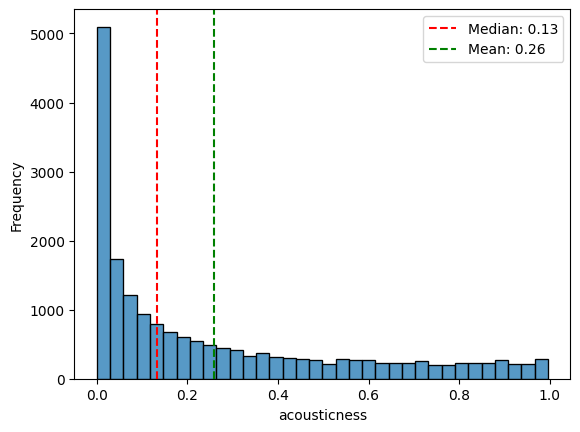

In [102]:
# sns.histplot(x = df['acousticness'])
plothist_median("acousticness")

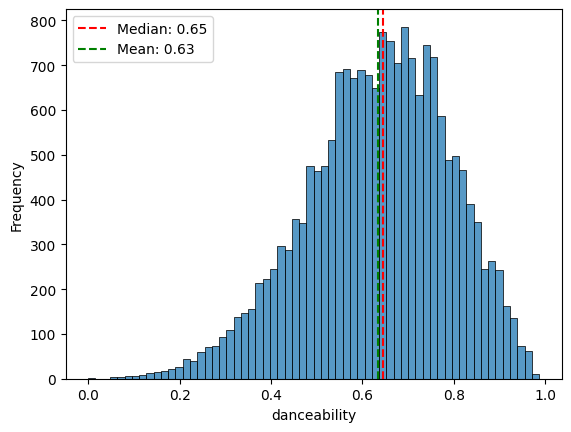

In [103]:
# sns.histplot(x = df['danceability'])
plothist_median("danceability")

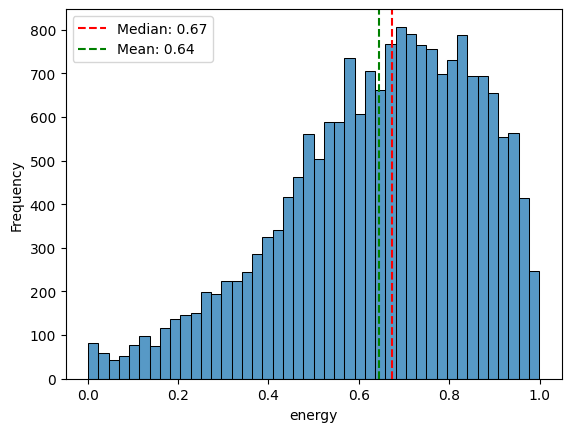

In [104]:
# sns.histplot(x = df['energy'])
plothist_median("energy")

(0.0, 300.0)

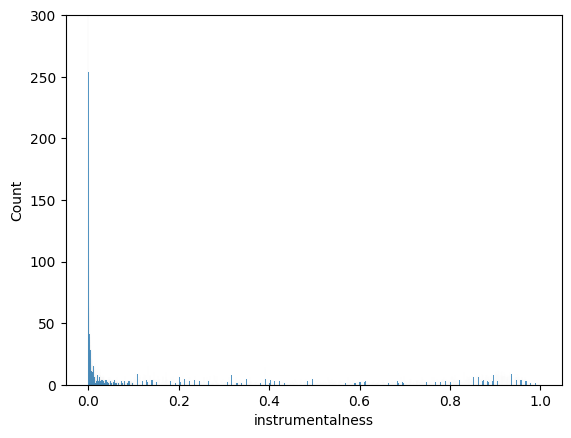

In [105]:
sns.histplot(x = df['instrumentalness'])
# plothist_median("instrumentalness",300)
# # restrict y axis to 500
plt.ylim(0, 300)

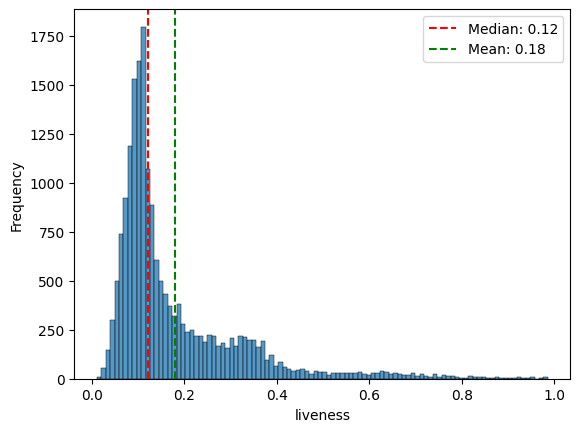

In [106]:
# sns.histplot(x = df['liveness'])
plothist_median("liveness")


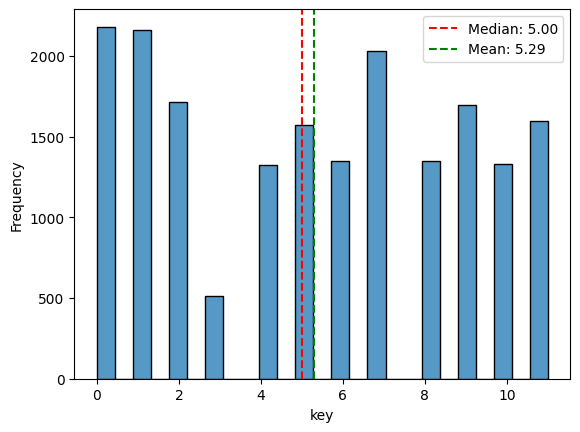

In [107]:
# sns.histplot(x = df['key'])
plothist_median("key")


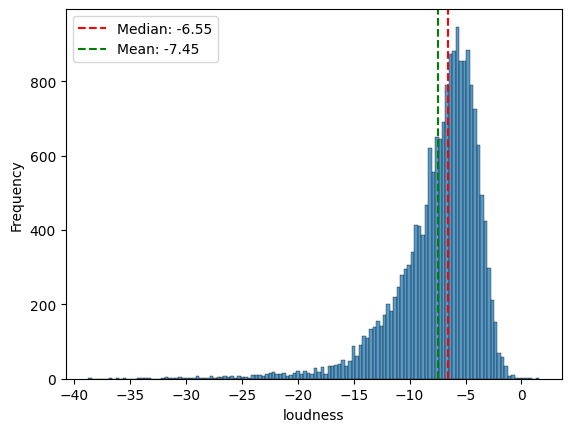

In [108]:
# sns.histplot(x = df['loudness'])
plothist_median("loudness")

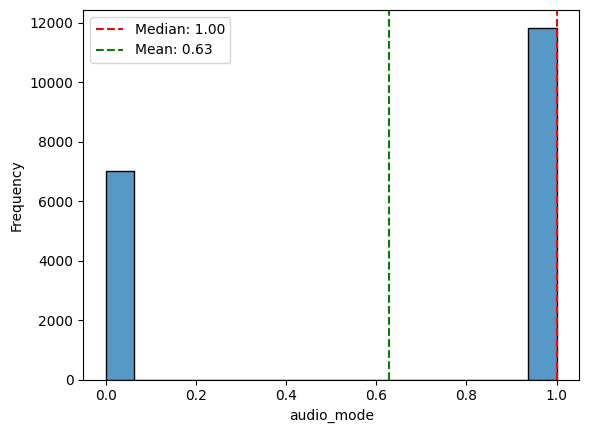

In [109]:
# sns.histplot(x = df['audio_mode'])
plothist_median("audio_mode")

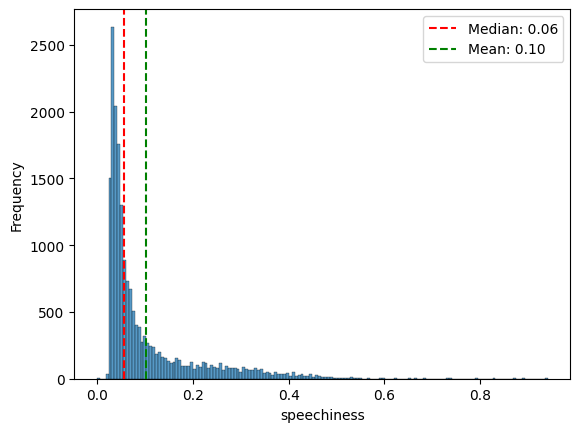

In [110]:
# sns.histplot(x = df['speechiness'])
plothist_median("speechiness")

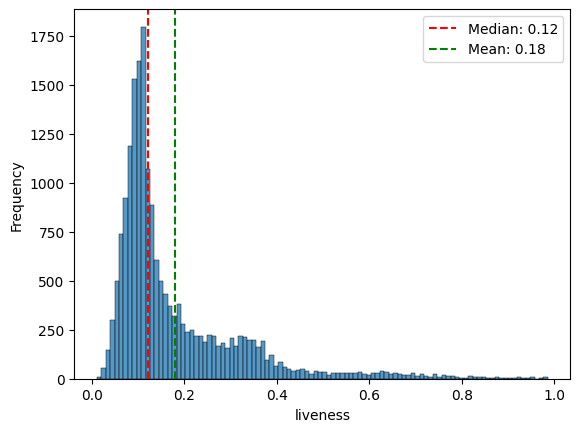

In [111]:
# sns.histplot(x = df['time_signature'])  
plothist_median("liveness")


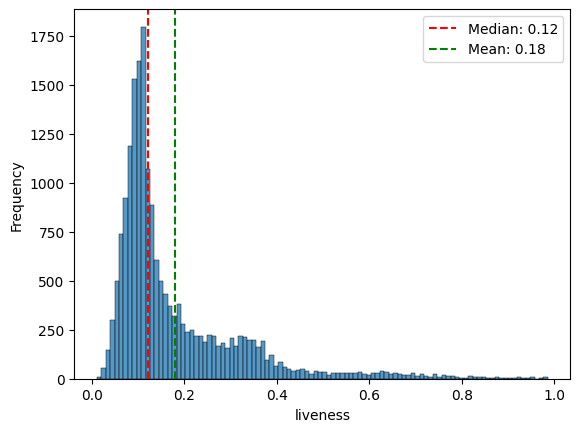

In [112]:
# sns.histplot(x = df['audio_valence'])
plothist_median("liveness")


<Axes: >

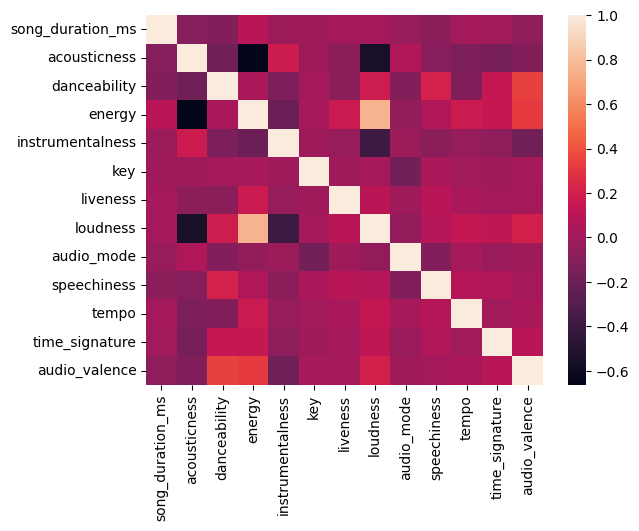

In [113]:
# df.corr()
df_numerical = df.drop(columns=['song_name', 'artist_name', 'album_names', 'playlist', 'song_popularity'])
sns.heatmap(df_numerical.corr())

In [114]:
df.head()

,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,song_popularity
0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,73
1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems,66
2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems,76
3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74
4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems,56


song_name


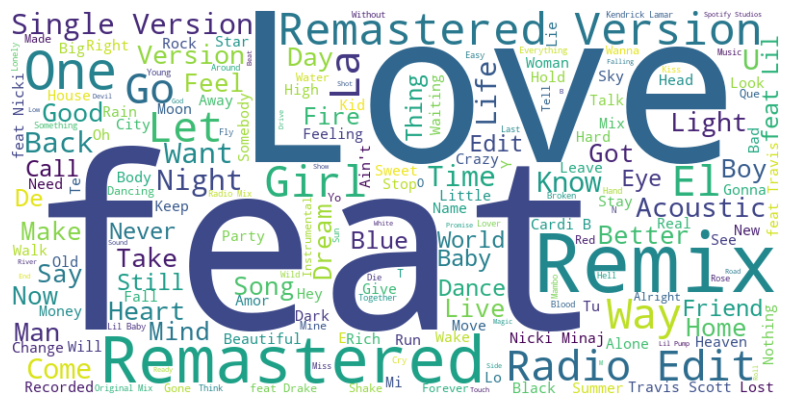

artist_name


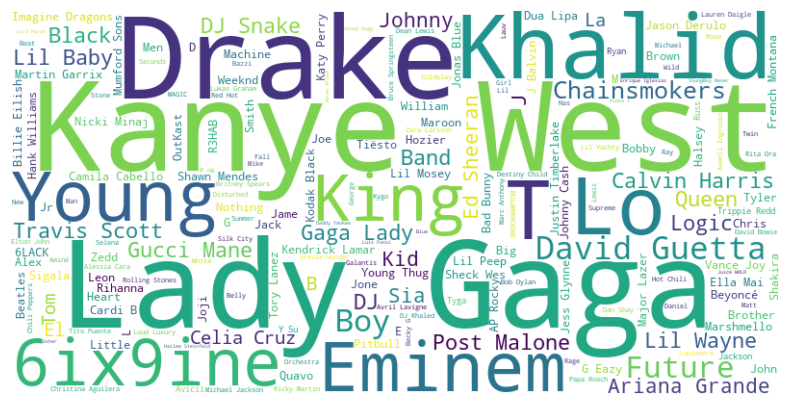

album_names


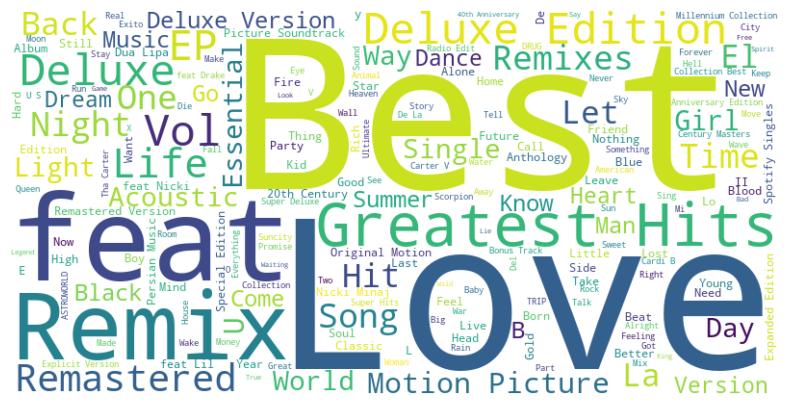

playlist


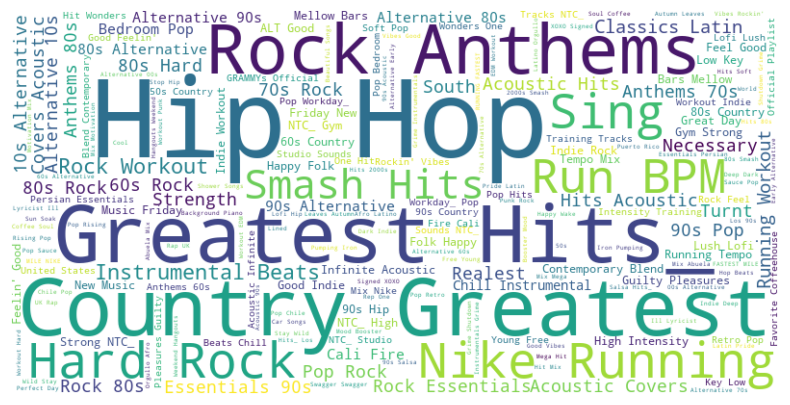

In [115]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

columns=['song_name', 'artist_name', 'album_names', 'playlist']
for col in columns:
    print(col)
    # Assuming you have a DataFrame named df with a column named 'text'
    text_data = df[col].str.cat(sep=' ')  # Concatenate all text data into a single string

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Plot the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis labels
    plt.show()


In [116]:
df = pd.read_csv('dataset.csv')

In [117]:
df.head()

,s_no,song_name,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,0,Boulevard of Broken Dreams,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
1,1,In The End,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular
2,2,Seven Nation Army,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
3,3,By The Way,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
4,4,How You Remind Me,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop


In [118]:
song_name = df['song_name']

In [119]:
df = df.drop('s_no' , axis = 1)
df= df.drop('song_name' , axis = 1)

In [120]:
df.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Popular
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Mildly Popular
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,Popular
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Popular
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Potential Flop


In [121]:
# label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label'] = le.fit_transform(df['label'])

df.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,label
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,1
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,0
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,1
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,1
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,2


In [140]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Mildly Popular': 0, 'Popular': 1, 'Potential Flop': 2, 'Potential Masterpiece': 3}


In [122]:
# train test split 


from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test = train_test_split(df.drop('label' , axis = 1) , df['label'] , test_size = 0.1 , random_state = 37)


In [123]:
x_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10960,152984,0.94700,0.594,0.304,0.198000,9,0.0933,-15.353,0,0.0290,79.994,4,0.130
12925,240712,0.00348,0.429,0.996,0.000108,1,0.3240,-4.338,0,0.1340,158.337,4,0.185
10101,271306,0.00073,0.477,0.882,0.210000,0,0.4400,-4.506,0,0.0594,174.015,4,0.343
12423,225539,0.23800,0.600,0.671,0.000000,0,0.1640,-4.875,1,0.0893,129.782,4,0.250
17343,236866,0.20000,0.725,0.974,0.000014,6,0.1590,-5.323,1,0.0526,127.054,4,0.727


In [124]:
type(y_train)

pandas.core.series.Series

In [125]:
# min max scaler 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [126]:
columns = df.columns [:-1]

x_train = pd.DataFrame(x_train , columns= columns)
y_train = pd.DataFrame(y_train)

x_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.078879,0.950803,0.601824,0.303558,0.198596,0.818182,0.084504,0.580254,0.0,0.030818,0.330120,0.8,0.132114
1,0.127962,0.003493,0.434650,0.996994,0.000108,0.090909,0.321095,0.853220,0.0,0.142402,0.653426,0.8,0.188008
2,0.145079,0.000732,0.483283,0.882757,0.210632,0.000000,0.440057,0.849057,0.0,0.063124,0.718127,0.8,0.348577
3,0.119473,0.238955,0.607903,0.671320,0.000000,0.000000,0.157010,0.839913,1.0,0.094899,0.535585,0.8,0.254065
4,0.125810,0.200802,0.734549,0.974948,0.000014,0.545455,0.151882,0.828811,1.0,0.055898,0.524328,0.8,0.738821


In [127]:
y_train

,label
10960,2
12925,2
10101,2
12423,0
17343,2
...,...
11898,0
4118,0
988,0
9036,1


In [128]:
y_train = pd.DataFrame(y_train , columns= ['label'])

In [129]:
x_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.078879,0.950803,0.601824,0.303558,0.198596,0.818182,0.084504,0.580254,0.0,0.030818,0.330120,0.8,0.132114
1,0.127962,0.003493,0.434650,0.996994,0.000108,0.090909,0.321095,0.853220,0.0,0.142402,0.653426,0.8,0.188008
2,0.145079,0.000732,0.483283,0.882757,0.210632,0.000000,0.440057,0.849057,0.0,0.063124,0.718127,0.8,0.348577
3,0.119473,0.238955,0.607903,0.671320,0.000000,0.000000,0.157010,0.839913,1.0,0.094899,0.535585,0.8,0.254065
4,0.125810,0.200802,0.734549,0.974948,0.000014,0.545455,0.151882,0.828811,1.0,0.055898,0.524328,0.8,0.738821


In [130]:
#  value counts 

y_train['label'].value_counts()


label
2    8757
0    4182
1    2334
3    1678
Name: count, dtype: int64

In [138]:
# random forest 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 1000 , n_jobs=-1)

rf.fit(x_train , y_train)

rf.score(x_test , y_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7707006369426752

In [145]:
x_test[0]

array([0.14284084, 0.00211711, 0.27051672, 0.95390458, 0.        ,
       0.09090909, 0.2790483 , 0.83931802, 0.        , 0.10201913,
       0.35073333, 0.8       , 0.57723577])

In [147]:
pred=rf.predict(x_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [148]:
pred

array([1, 2, 0, ..., 2, 2, 0])

In [149]:
y_test

516      1
4024     2
12318    0
13006    0
16113    2
        ..
2527     0
17753    2
18605    0
9868     2
16123    0
Name: label, Length: 1884, dtype: int32

In [132]:
# decision tree 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train , y_train)

dt.score(x_test , y_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6321656050955414

In [133]:
# naive byes 

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train , y_train)

nb.score(x_test , y_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.35774946921443734

In [134]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train , y_train)

lr.score(x_test , y_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegr

0.529723991507431

In [136]:
# SVM linear 

from sklearn.svm import SVC

svc = SVC(C=10,gamma=0.01,kernel='rbf')

svc.fit(x_train , y_train)

svc.score(x_test , y_test)

c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dhair\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.5302547770700637

In [137]:
df.count

<bound method DataFrame.count of        song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0                262333      0.005520         0.496   0.682          0.000029   
1                216933      0.010300         0.542   0.853          0.000000   
2                231733      0.008170         0.737   0.463          0.447000   
3                216933      0.026400         0.451   0.970          0.003550   
4                223826      0.000954         0.447   0.766          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.893000         0.500   0.151          0.000065   
18831            205666      0.765000         0.495   0.161          0.000001   
18832            182211      0.847000         0.719   0.325          0.000000   
18833            352280      0.945000         0.488   0.326          0.015700   
18834            193533      0.911000         0.640   0.381          0.00025